<a id="Title"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Titanic Survivor Prediction</b></div>

<a id="description"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Notebook Description</b></div>


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;">
    <p>
        Welcome to this Titanic Survivor Prediction notebook!

In this project, we'll explore two classic machine learning models:
- **Logistic Regression**
- **Naive Bayes**

Our goal is to predict whether passengers survived the Titanic disaster based on their features.
</p>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>TASK #1: UNDERSTAND THE PROBLEM STATEMENT
</b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;">
    <p>The sinking of the Titanic is one of the most tragic tragedies in history. The tragedy took place on April 15th, 1912. The Titanic
sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to lack of
lifeboats for all passengers. Some passengers were more likely to survive than others, such as women, children, and upper-
class. This case study analyzes what sorts of people were likely to survive this tragedy.
</p></div>


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>TASK #2: IMPORT LIBRARIES AND DATASET
</b></div>

In [1]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data using pandas dataframe
titanic_df = pd.read_csv('titanic.csv')

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b> TASK #3:  Basic EDA on the Dataset
</b></div>


## 📊 Exploratory Data Analysis (EDA)
Let's explore the dataset visually to understand patterns and relationships.
We'll create visualizations using **Seaborn** and **Matplotlib**.

Key insights include:
- Survival rate based on gender
- Survival distribution across passenger classes
- Age distribution of passengers


In [3]:
# Show the data head!
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Let's start Analysing the Dataset</b></div>

In [7]:
# Let's count the number of survivors and non-survivors
survived_df = titanic_df[titanic_df['Survived'] == 1]
no_survived_df = titanic_df[titanic_df['Survived'] == 0]

In [8]:
# Count the survived and deceased 
print("Total =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", len(survived_df) / len(titanic_df) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", len(no_survived_df) / len(titanic_df) * 100.0, "%")
         

Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38383838383838 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


In [9]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival

<Axes: xlabel='Pclass', ylabel='count'>

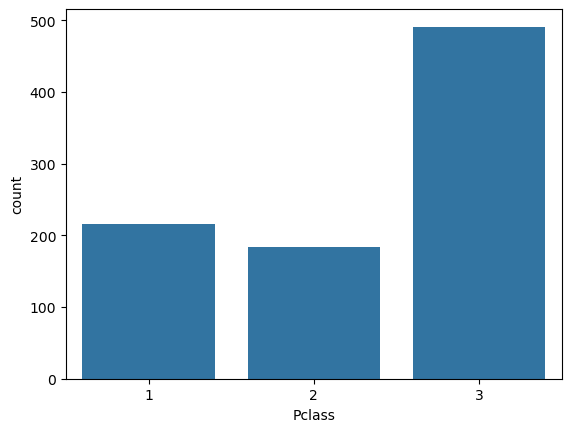

In [10]:
sns.countplot(data=titanic_df,x='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

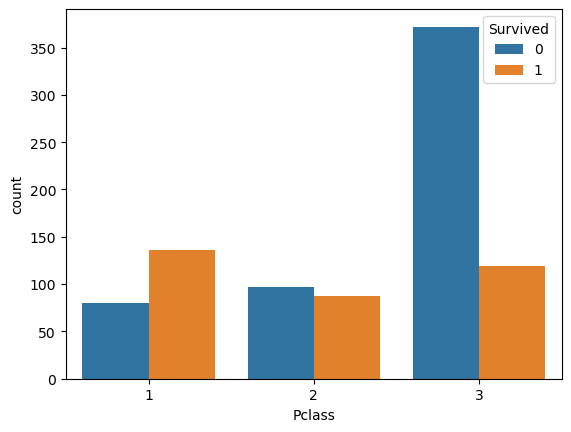

In [11]:
sns.countplot(data=titanic_df,x='Pclass',hue='Survived')

## **Plot the number of people who survived based on thier siblings status**
- **Do you have a higher chance of survival if you have zero or one sibling?**

In [12]:
# sns.countplot(data=titanic_df,x='SibSp',hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

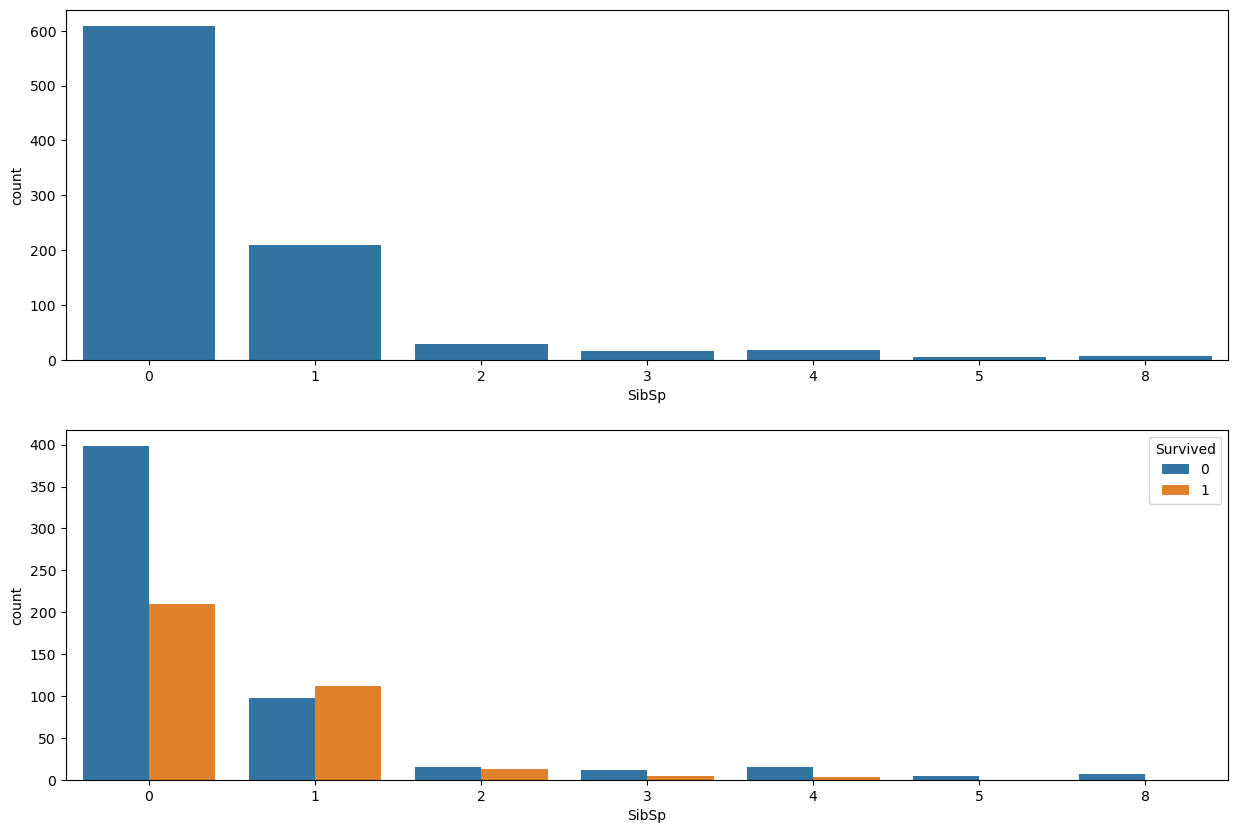

In [13]:
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_df)

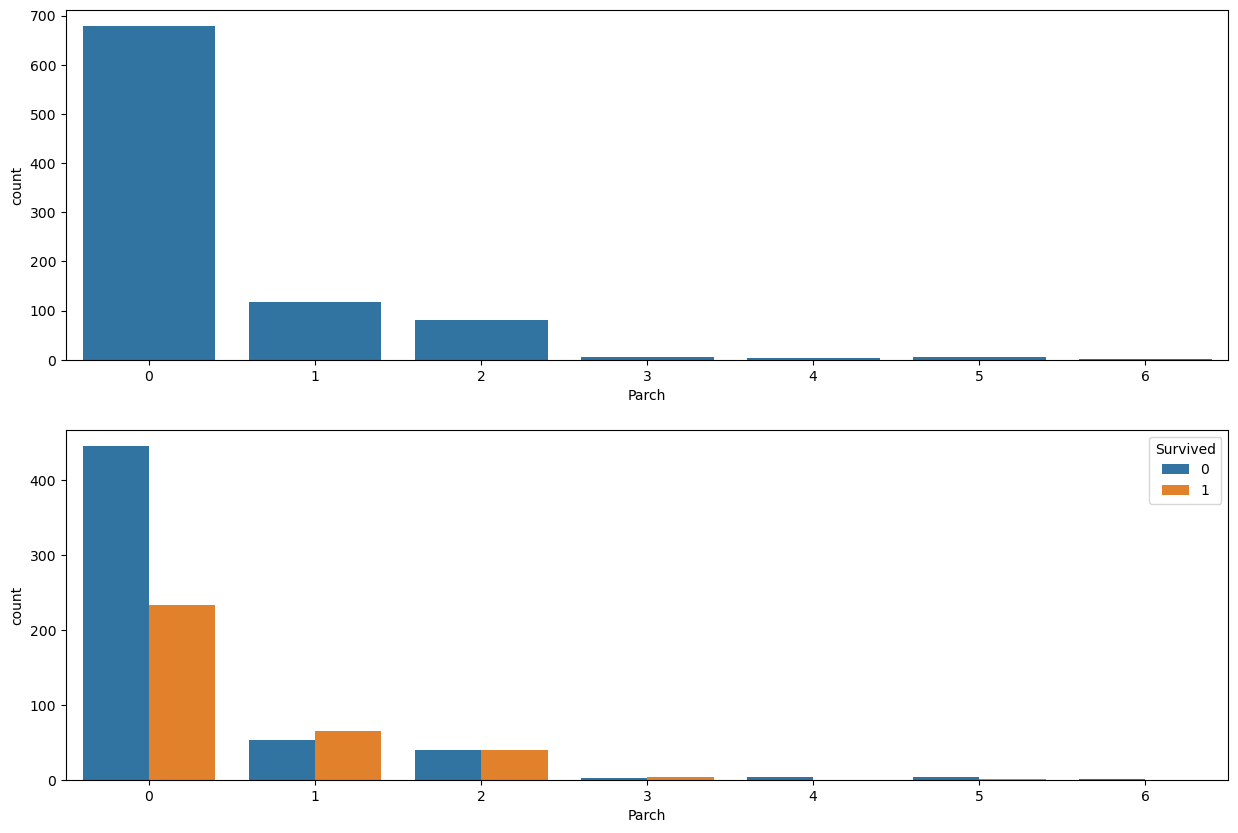

In [14]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Parch', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data = titanic_df)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

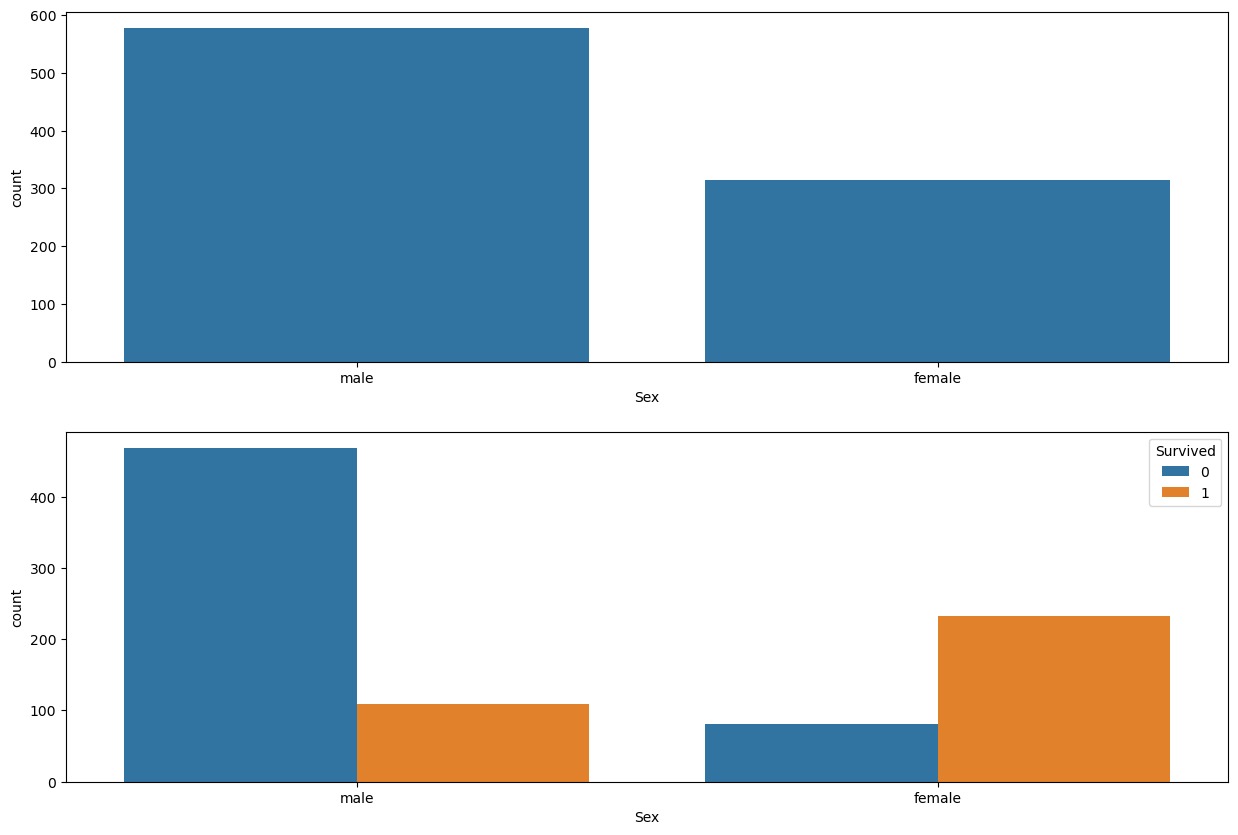

In [15]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Sex', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df)

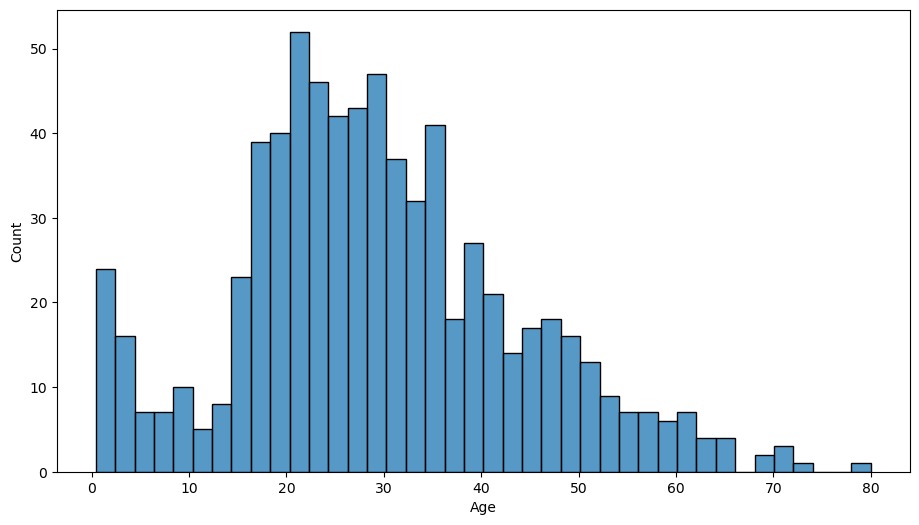

In [16]:
# Age Histogram 
plt.figure(figsize=[11,6])
sns.histplot(data=titanic_df,x='Age',bins=40)
plt.show()

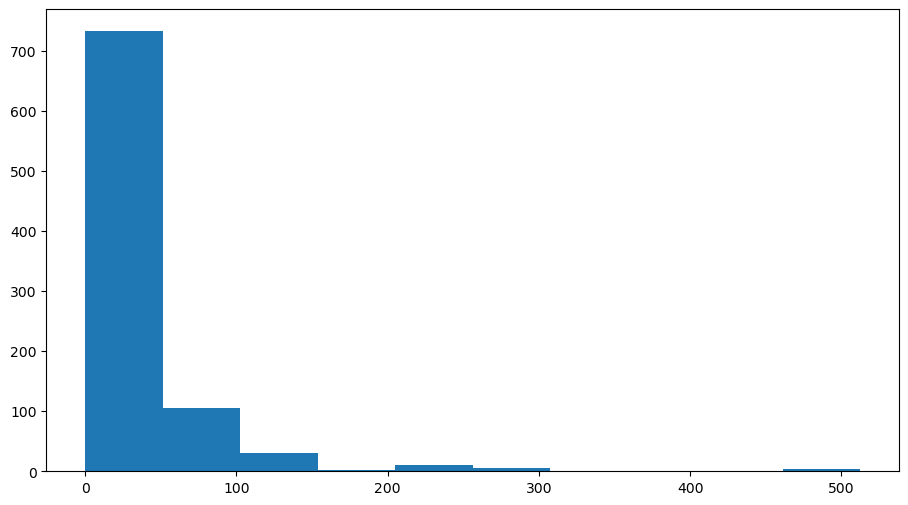

In [17]:
plt.figure(figsize=[11,6])
plt.hist(data=titanic_df,x='Fare')
plt.show()

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>TASK #4: PERFORM DATA CLEANING AND FEATURE ENGINEERING
</b></div>

<Axes: >

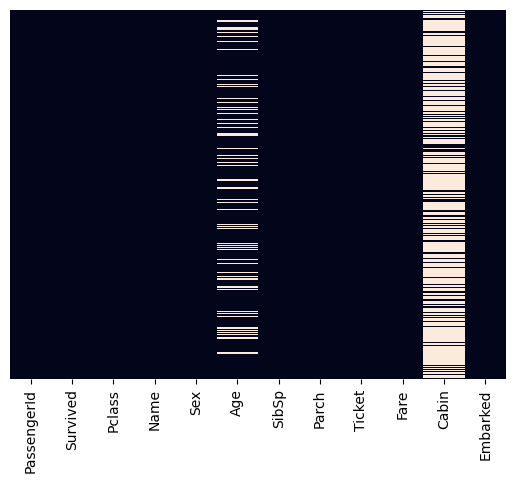

In [18]:
# Let's explore which dataset is missing
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False)

In [19]:
# Let's drop the cabin coloumn and test with inplace = true and false
titanic_df.drop('Cabin',axis=1,inplace=True)

In [20]:
# Let's drop the embarked, Ticket, passengerID, and Name as well
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [21]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<Axes: >

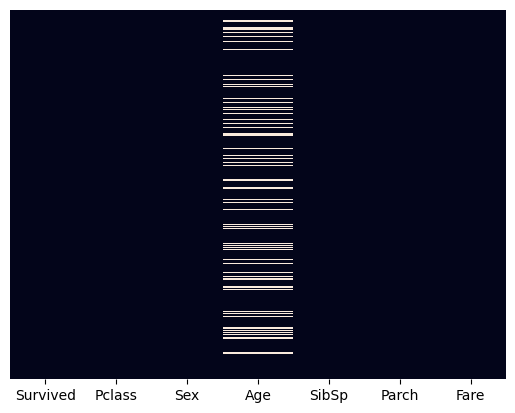

In [22]:
# Let's view the data one more time!
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False)

<Axes: xlabel='Sex', ylabel='Age'>

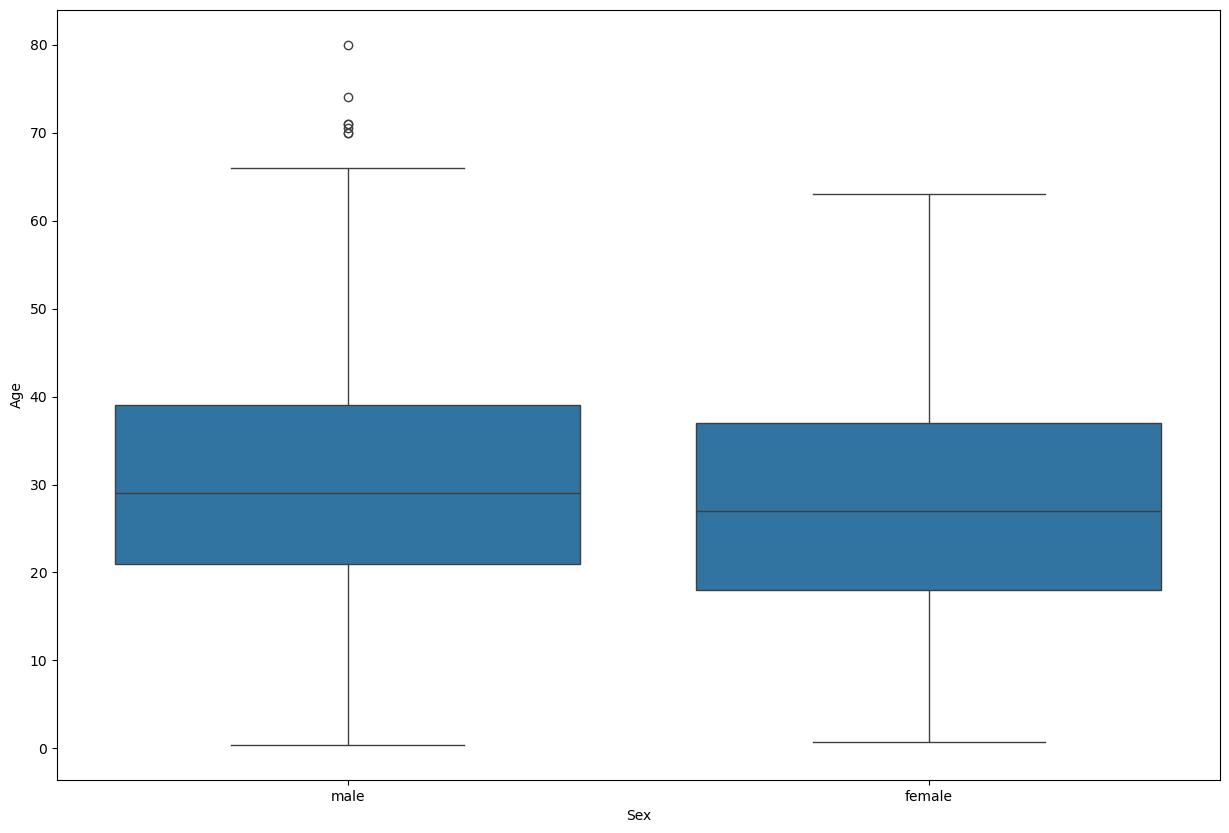

In [23]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Sex', y = 'Age', data = titanic_df)

In [24]:
def Fill_Age(data):
    age = data.iloc[0]  # Accessing by position
    sex = data.iloc[1]  

    if pd.isnull(age):
        if sex == 'male': 
            return 29
        else:
            return 25
    else:
        return age

In [25]:
titanic_df['Age'] = titanic_df[['Age','Sex']].apply(Fill_Age,axis=1)

<Axes: >

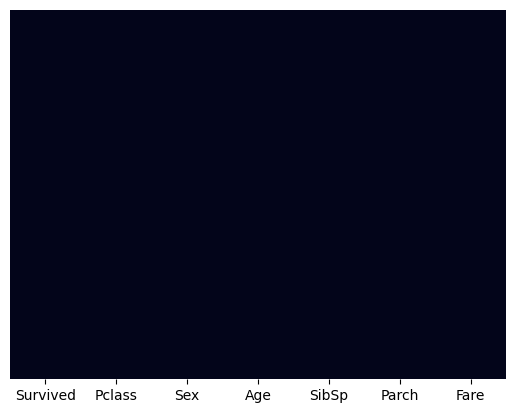

In [26]:
# Let's view the data one more time!
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False)

In [27]:
# You just need one column only to represent male or female
dummies = pd.get_dummies(titanic_df['Sex'], drop_first=True)

In [28]:
titanic_df = pd.concat([titanic_df,dummies],axis=1)

In [29]:
titanic_df.drop('Sex', axis=1, inplace=True)

In [30]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True


<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>TASK #5: TRAIN LOGISTIC REGRESSION CLASSIFIER MODEL
</b></div>

## 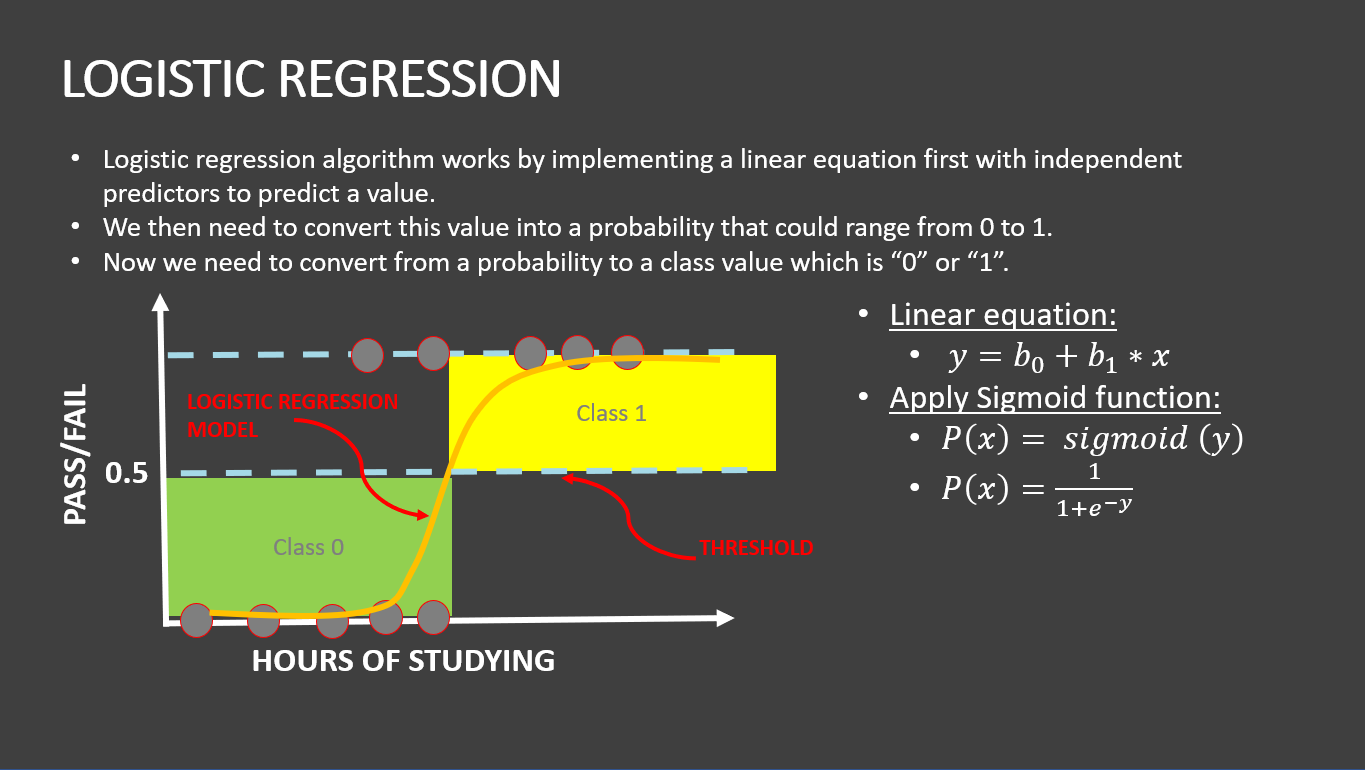

In [31]:
#Let's drop the target coloumn before we do train test split
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [33]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>TASK #6: ASSESS TRAINED MODEL PERFORMANCE

</b></div>


## 📈 Model Evaluation
We'll evaluate both models using the following metrics:
- Accuracy
- Precision
- Recall
- F1-Score

### Confusion Matrix
A heatmap will visually represent the model's performance.

---


In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

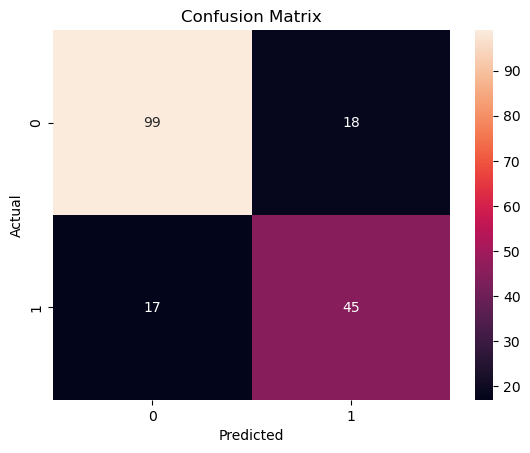

In [36]:
from sklearn.metrics import confusion_matrix # visual representation of model performance

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

----

True Positives (TP): Correctly predicted positive cases.

True Negatives (TN): Correctly predicted negative cases.

False Positives (FP): Wrongly predicted positive cases (Type I Error).

False Negatives (FN): Wrongly predicted negative cases (Type II Error).

----

In [37]:
# The classification_report() function from Scikit-learn provides a comprehensive summary of your model's performance.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



- Precision: How many positive predictions were correct?

- Recall: How many actual positives were correctly predicted?

- F1-score: Harmonic mean of Precision and Recall

- Support: Number of actual occurrences for each class

- Macro avg: Average across both classes (0 and 1)

- Weighted avg: Average weighted by support count

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Train a Naive Bayes Classifier Model using Scikit-Learn
</b></div>

In [38]:
# Fitting Naive Bayes Classifier Model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179



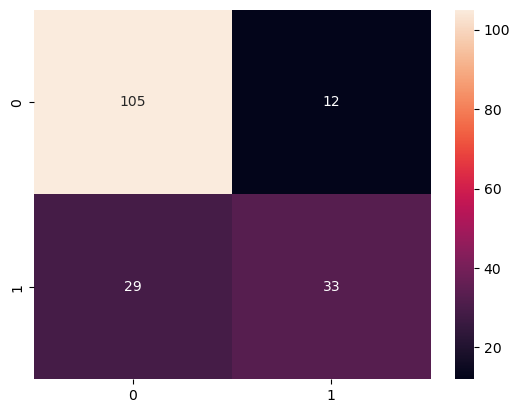

In [39]:
y_predict_test = classifier.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

print(classification_report(y_test, y_predict_test))

## Observations:
- Logistic Regression performs better in terms of Accuracy and F1-Score.
- Precision is slightly better in Naive Bayes for Class 1 (positive class).
- Recall is much lower in Naive Bayes, meaning it misses more positive cases.
- Naive Bayes performs better when the data has independent features — but Titanic dataset features might not be fully independent.